In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [55]:
#Cargamos el dataset
df= pd.read_csv('apartments.csv', encoding='cp1252', low_memory=False)

In [56]:
#Aqui si se pueden visualizar las primeras 5 filas
print(df.head())

           id                category                            title  \
0  5668640009  housing/rent/apartment       One BR 507 & 509 Esplanade   
1  5668639818  housing/rent/apartment      Three BR 146 Lochview Drive   
2  5668639686  housing/rent/apartment  Three BR 3101 Morningside Drive   
3  5668639659  housing/rent/apartment            Two BR 209 Aegean Way   
4  5668639374  housing/rent/apartment         One BR 4805 Marquette NE   

                                                body amenities  bathrooms  \
0  This unit is located at 507 & 509 Esplanade, R...       NaN        1.0   
1  This unit is located at 146 Lochview Drive, Ne...       NaN        1.5   
2  This unit is located at 3101 Morningside Drive...       NaN        2.0   
3  This unit is located at 209 Aegean Way, Vacavi...       NaN        1.0   
4  This unit is located at 4805 Marquette NE, Alb...       NaN        1.0   

   bedrooms currency fee  has_photo  ... price_display  price_type  \
0       1.0      USD  

In [57]:
#Filas y columnas del dataset
print(df.shape)

(100000, 22)


In [58]:
#Informacion del dataset es decir el tipo de dato de cada columna y si hay valores nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             100000 non-null  int64  
 1   category       100000 non-null  object 
 2   title          100000 non-null  object 
 3   body           100000 non-null  object 
 4   amenities      83903 non-null   object 
 5   bathrooms      99930 non-null   float64
 6   bedrooms       99869 non-null   float64
 7   currency       99993 non-null   object 
 8   fee            99993 non-null   object 
 9   has_photo      99993 non-null   object 
 10  pets_allowed   39255 non-null   object 
 11  price          99992 non-null   float64
 12  price_display  99992 non-null   object 
 13  price_type     99993 non-null   object 
 14  square_feet    99993 non-null   float64
 15  address        7943 non-null    object 
 16  cityname       99691 non-null   object 
 17  state          99691 non-null 

In [59]:
#Estadisticas del dataset
print(df.describe())

                 id     bathrooms      bedrooms         price   square_feet  \
count  1.000000e+05  99930.000000  99869.000000  99992.000000  99993.000000   
mean   5.358815e+09      1.445372      1.727934   1527.183765    956.423830   
std    1.846077e+08      0.546878      0.748924    903.252861    417.098512   
min    5.121046e+09      1.000000      0.000000    100.000000    101.000000   
25%    5.197954e+09      1.000000      1.000000   1014.000000    729.000000   
50%    5.508674e+09      1.000000      2.000000   1350.000000    900.000000   
75%    5.509009e+09      2.000000      2.000000   1795.000000   1115.000000   
max    5.669439e+09      9.000000      9.000000  52500.000000  50000.000000   

           latitude     longitude          time  
count  99968.000000  99968.000000  9.999300e+04  
mean      36.950051    -91.554563  1.559695e+09  
std        4.599818     15.819821  1.104320e+07  
min       19.573800   -159.369800  1.544174e+09  
25%       33.749600   -104.791900  1.5

In [60]:
#Ver cuantos valores nulos hay en cada columna
print(df.isnull().sum())

id                   0
category             0
title                0
body                 0
amenities        16097
bathrooms           70
bedrooms           131
currency             7
fee                  7
has_photo            7
pets_allowed     60745
price                8
price_display        8
price_type           7
square_feet          7
address          92057
cityname           309
state              309
latitude            32
longitude           32
source               7
time                 7
dtype: int64


In [61]:
# Convertir la columna 'price_display' y 'square_feet' a numérico, manejando errores
df['price_display'] = pd.to_numeric(df['price_display'], errors='coerce')
df['square_feet'] = pd.to_numeric(df['square_feet'], errors='coerce')

In [62]:
#Podemos eliminar las filas con valores nulos o imputar los valores faltantes
#En este caso crearemos una copia del dataset sin los valores nulos
df2 = df.dropna()
#Verificamos que se hayan eliminado los valores nulos
print(df2.isnull().sum())

id               0
category         0
title            0
body             0
amenities        0
bathrooms        0
bedrooms         0
currency         0
fee              0
has_photo        0
pets_allowed     0
price            0
price_display    0
price_type       0
square_feet      0
address          0
cityname         0
state            0
latitude         0
longitude        0
source           0
time             0
dtype: int64


In [63]:
#Sin embargo el data set se redujo a mas la mitad en filas
print(df2.shape)


(2917, 22)


<h1>Distribucion de variables categoricas</h1>

In [64]:
print("Distribucion de los valores para Estado")
print(df2['state'].value_counts())

Distribucion de los valores para Estado
state
TX    515
CA    213
WI    206
FL    158
MO    148
IN    128
IL    105
WA    103
GA     90
AZ     84
NC     80
MN     80
OH     74
VA     65
MI     65
NY     62
CO     61
IA     56
MA     51
OR     45
TN     41
MD     39
PA     39
SC     37
KS     36
SD     33
NE     33
AK     29
NV     26
OK     25
AR     24
UT     21
DC     21
CT     19
NJ     18
KY     18
AL     16
LA     14
ND      9
RI      8
NH      5
WY      4
ID      3
MS      3
HI      3
DE      2
NM      1
MT      1
Name: count, dtype: int64


In [65]:
print("Distribucion de los valores para Amenities")
print(df2['amenities'].value_counts())

Distribucion de los valores para Amenities
amenities
Dishwasher,Refrigerator                                                                                                                                    181
Parking                                                                                                                                                     58
Parking,Pool                                                                                                                                                53
Pool                                                                                                                                                        51
Dishwasher,Parking,Pool,Refrigerator                                                                                                                        51
                                                                                                                                                        

<h1>Histograma para la distribucion de variables numericas</h1>

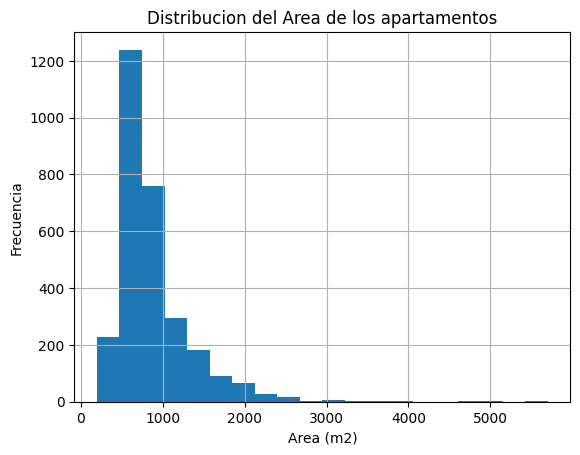

In [66]:
#Histograma para la columna Area
df2['square_feet'].hist(bins=20)
plt.title('Distribucion del Area de los apartamentos')
plt.xlabel('Area (m2)')
plt.ylabel('Frecuencia')
plt.show()

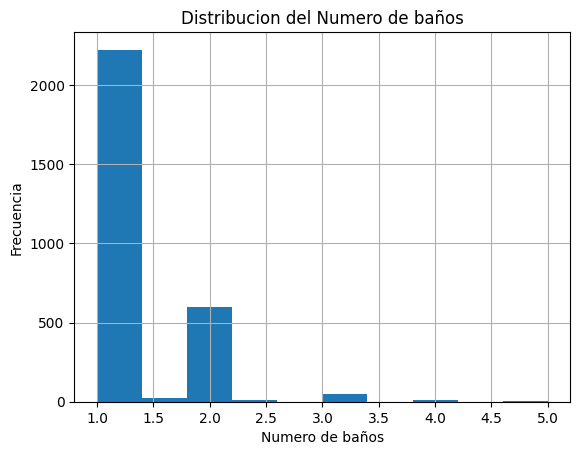

In [67]:
#Histograma para la columna de Baños
df2['bathrooms'].hist(bins=10)
plt.title('Distribucion del Numero de baños')
plt.xlabel('Numero de baños')
plt.ylabel('Frecuencia')
plt.show()

<h1>Correlacion de variables numericas</h1>

In [68]:
#Filtramos solo las columnas numericas
correlation_matrix = df2.select_dtypes(include='number').corr()

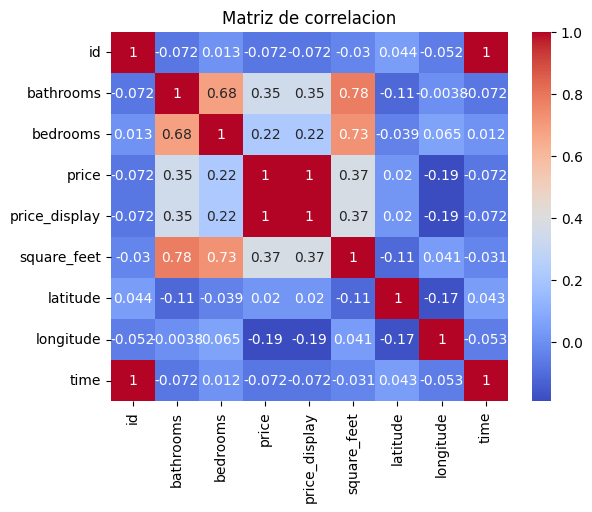

In [69]:
#Ahora visualizamos la matriz de correlacion
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlacion')
plt.show()

<h1>Identificacion de valores atipicos</h1>

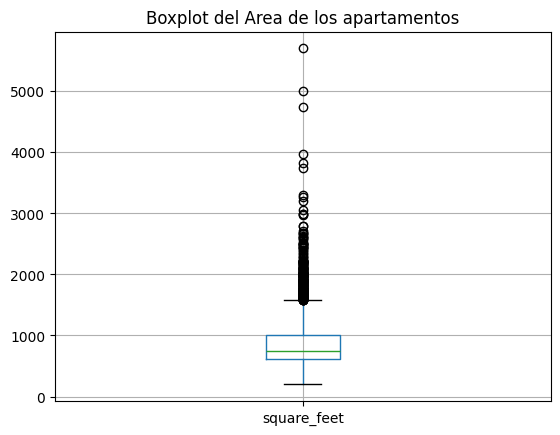

In [70]:
df2.boxplot(column='square_feet')
plt.title('Boxplot del Area de los apartamentos')
plt.show()

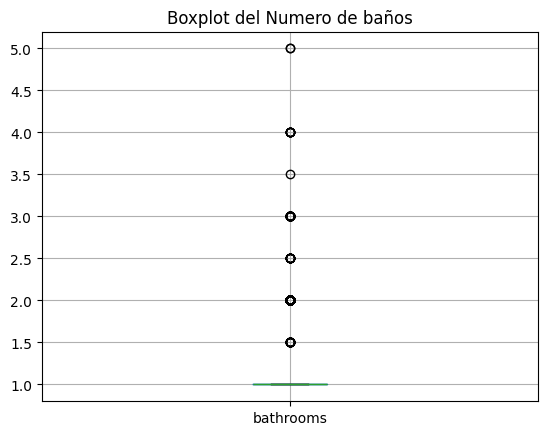

In [71]:
#Boxplot para la columna baños
df2.boxplot(column='bathrooms')
plt.title('Boxplot del Numero de baños')
plt.show()

<h1>Preprocesamiento de datos</h1>

In [72]:
#Imputamos valores nulos con la mediana 
df2['square_feet'].fillna(df2['square_feet'].median(), inplace=True)

C:\Users\Diws\AppData\Local\Temp\ipykernel_22536\91086710.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['square_feet'].fillna(df2['square_feet'].median(), inplace=True)
C:\Users\Diws\AppData\Local\Temp\ipykernel_22536\91086710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['square_feet'].fillna(df2['square_feet'].median(), i

<h1>Aplicar one-hot encoding para convertiar en datos numericos a las demas columnas</h1>

In [73]:
#APlicamos tecnica one hot encoding para convertir las variables categoricas en numericas
# Ejemplo de codificación one-hot de la columna 'state'
df2 = pd.get_dummies(df, columns=['state'], drop_first=True)

# Ahora veremos que el dataset elimino las columnas 'state' y agrego nuevas columnas con la codificación one-hot
print("Columnas del dataset:")
print(df2.columns)

Columnas del dataset:
Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'latitude', 'longitude', 'source', 'time', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY'],
      dtype='object')


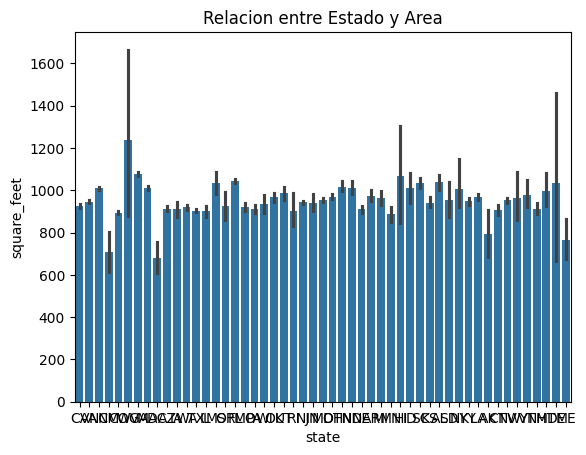

In [74]:
#Grafico de barras para la realacion entre 'Estado' y 'Area'
sns.barplot(x='state', y='square_feet', data=df)
plt.title('Relacion entre Estado y Area')
plt.show()

<h1>Visualizar columna irrelevantes de manera manual</h1>

In [75]:
#ELiminar columnas irrelevantes
df2.drop(columns=['title','body','amenities', 'currency','fee','has_photo','address','source','cityname','category','pets_allowed'], inplace=True)

In [76]:
#one hot encoding para la columna 'pets_allowed' y 'price_type'
df2 = pd.get_dummies(df2, columns=['price_type'], drop_first=True)
# Ahora veremos que el dataset elimino las columnas 'state' y agrego nuevas columnas con la codificación one-hot
print("Columnas del dataset:")
print(df2.columns)

Columnas del dataset:
Index(['id', 'bathrooms', 'bedrooms', 'price', 'price_display', 'square_feet',
       'latitude', 'longitude', 'time', 'state_AL', 'state_AR', 'state_AZ',
       'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
       'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC',
       'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV',
       'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
       'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA',
       'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY',
       'price_type_Monthly|Weekly', 'price_type_Weekly'],
      dtype='object')


In [77]:
#Ver datos nulos de df2
print(df2.isnull().sum())

id                             0
bathrooms                     70
bedrooms                     131
price                          8
price_display                 40
                            ... 
state_WI                       0
state_WV                       0
state_WY                       0
price_type_Monthly|Weekly      0
price_type_Weekly              0
Length: 61, dtype: int64


In [78]:
#Realizar limpieda de datos nulos 
df2.dropna(inplace=True)
#Ver datos nulos de df2
print(df2.isnull().sum())

id                           0
bathrooms                    0
bedrooms                     0
price                        0
price_display                0
                            ..
state_WI                     0
state_WV                     0
state_WY                     0
price_type_Monthly|Weekly    0
price_type_Weekly            0
Length: 61, dtype: int64


<h1>Correlacion entre caracteristicas</h1>

In [79]:
#natruz de correlacion para detectar caracteristicas altamente correlacionadas
correlation_matrix = df2.select_dtypes(include='number').corr()

#Filtramos las caracteristicas altamente correlacionadas (mayor a 0.8)
highly_correlated = [column for column in correlation_matrix.columns if any(correlation_matrix[column] > 0.8)]
print("Caracteristicas altamente correlacionadas:")
print(highly_correlated)


Caracteristicas altamente correlacionadas:
['id', 'bathrooms', 'bedrooms', 'price', 'price_display', 'square_feet', 'latitude', 'longitude', 'time']


El modelo de Random Forest (RandomForestClassifier) requiere que todas las variables predictoras (en este caso, las columnas en X) sean numéricas.
Por lo tanto tenemos que ajustar nuestro data set

Definimos variables para arbol de decision

In [80]:
#Definimos las variables predictoras y la variable objetivo
X = df2.drop('square_feet',axis=1)
Y = df2['square_feet']

Indetificamos columnas categoricas de tipo objeto

In [81]:
categorical_columns = X.select_dtypes(include=['object']).columns
print(categorical_columns)

Index([], dtype='object')


Transformar esas columnas a numericas

In [82]:
X_encoded = pd.get_dummies(X, drop_first=True)  # Convierte variables categóricas en dummies
print(X_encoded.head())

           id  bathrooms  bedrooms   price  price_display  latitude  \
0  5668640009        1.0       1.0  2195.0         2195.0   33.8520   
1  5668639818        1.5       3.0  1250.0         1250.0   37.0867   
2  5668639686        2.0       3.0  1395.0         1395.0   35.8230   
3  5668639659        1.0       2.0  1600.0         1600.0   38.3622   
4  5668639374        1.0       1.0   975.0          975.0   35.1038   

   longitude          time  state_AL  state_AR  ...  state_TX  state_UT  \
0  -118.3759  1.577360e+09     False     False  ...     False     False   
1   -76.4941  1.577360e+09     False     False  ...     False     False   
2   -78.6438  1.577360e+09     False     False  ...     False     False   
3  -121.9712  1.577360e+09     False     False  ...     False     False   
4  -106.6110  1.577360e+09     False     False  ...     False     False   

   state_VA  state_VT  state_WA  state_WI  state_WV  state_WY  \
0     False     False     False     False     False     F

<h1>Arbol de decision</h1>

In [83]:

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

#Aplicamos el modelo de Random Forest
model = RandomForestClassifier(n_estimators=50, max_depth=10)
model.fit(X_train, Y_train)

#Obtenemos la importancia de las caracteristicas
feature_importances = model.feature_importances_
feature_names = X_encoded.columns

#Mostramos la importancia de las caracteristicas
for feature, importance in zip(feature_names, feature_importances):
    print(f'{feature}: {importance}')

id: 0.12665386828498598
bathrooms: 0.0653107937825822
bedrooms: 0.08914377472220394
price: 0.14076719031937412
price_display: 0.14111757317610046
latitude: 0.1141464659278118
longitude: 0.11796880332362569
time: 0.11650197752345537
state_AL: 0.0002101671358456544
state_AR: 0.0012115214134293397
state_AZ: 0.0015426534880894338
state_CA: 0.003251718523137199
state_CO: 0.004181000580739447
state_CT: 0.004239296012738506
state_DC: 6.183765860889818e-05
state_DE: 0.0001985747728262669
state_FL: 0.0015971852198693598
state_GA: 0.0021324831638240387
state_HI: 9.50674047576893e-05
state_IA: 0.00045509821484807073
state_ID: 0.0005113251910572243
state_IL: 0.0013007655395305053
state_IN: 0.0002240942197812886
state_KS: 0.0013269066061830292
state_KY: 0.002113861009075912
state_LA: 0.0029090801447392944
state_MA: 0.004906046809754167
state_MD: 0.0032761680926408367
state_ME: 0.000438930194547841
state_MI: 0.00044423441029113034
state_MN: 0.0003229499343753914
state_MO: 0.0005130842212080716
state

<h1>Seleccion de caracteristicas RFE</h1>

In [ ]:
#modelo base
model2 = LogisticRegression()

#Aplicamos la seleccion de caracteristicas con RFE
rfe = RFE(model2, n_features_to_select=5)
rfe.fit(X_train, Y_train)

#Mostramos las caracteristicas seleccionadas
selected_features = X.columns[rfe.support_]
print("Caracteristicas seleccionadas:")
print(selected_features)

In [ ]:
#Aplicar el umbral de varianza para eliminar caracteristicas con varianza baja
selector = VarianceThreshold(threshold=0.1)
selector.fit(X_train)

#Obtener las caracteristicas seleccionadas
selected_features = X.columns[selector.get_support()]
print("Caracteristicas seleccionadas:")
print(selected_features)

<h1>Analizar componentes principales</h1>

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
#Visalizamos las dos componentes principales
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)